# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import  load_model
from tensorflow.keras.utils import plot_model
import random

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Cleaning Data

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
r=df

In [8]:
r

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
z=df.diagnosis

In [10]:
z

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Transforming categorical classes into numerical data

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
print(df.dtypes)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [13]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
from sklearn import preprocessing
d = preprocessing.normalize(df)

scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000441,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,...,0.011181,0.007635,0.081325,0.889461,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.000421,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.000476,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.001429,0.016325,0.029133,0.110899,0.551921,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021314,0.037881,0.141332,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.000487,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
features=list(df.columns[1:31])

In [18]:
corr= df[features].corr()


In [19]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Training the model

In [20]:


#choosen_features=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst','concave points_worst']

In [21]:
from sklearn.model_selection import train_test_split
x=df[features]
y=df['diagnosis']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [23]:
print("Shape of training data is: ", x_train.shape)
print("Shape of testing data is: ", x_test.shape)

Shape of training data is:  (455, 30)
Shape of testing data is:  (114, 30)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
#x_train2=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [25]:
#x_train = x_train.reshape(455,30,1)
#x_test= x_test.reshape(114,30,1)

In [26]:
x_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [27]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores ": results['train_accuracy'],
 
              "Training Precision scores ": results['train_precision'],
     
       
              "Validation Accuracy scores ": results['test_accuracy'],
              "Validation Precision scores ": results['test_precision'],

  
              }

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D

from keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv1D,MaxPool1D
def create_model():
 model = Sequential()

 model.add(Conv1D(30,5,input_shape=(30,1),activation='relu'))
 model.add(MaxPool1D(pool_size=2))
 #model.add(BatchNormalization())
 model.add(Dropout(0.2))
 model.add(Conv1D(60,5,activation='relu'))
 model.add(MaxPool1D(pool_size=2)) 
 #model.add(BatchNormalization())

 model.add(Dropout(0.2))

 model.add(Flatten())
 model.add(Dense(64,activation='relu'))
 
 model.add(Dense(units=1,activation='sigmoid'))

 model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

 return model




In [29]:
model=create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 30)            180       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 30)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 60)             9060      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 60)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 60)             0

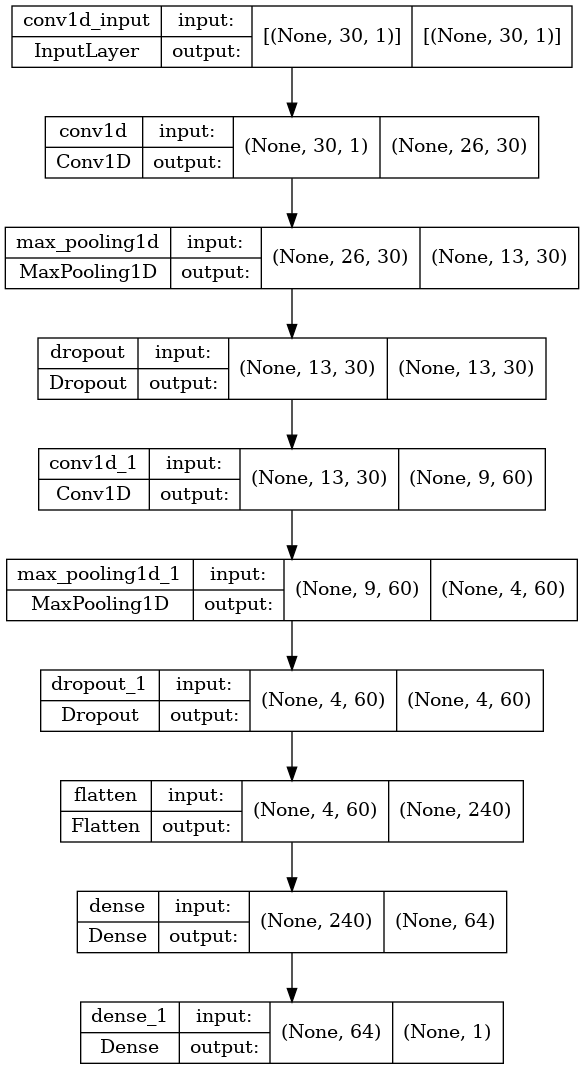

In [30]:
model.summary()
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [31]:
model_as_file = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [32]:

pat=5
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)


In [33]:
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=20, BATCH_SIZE=128):
    
    model = create_model()
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_as_file], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results 

In [34]:
# from sklearn.model_selection import StratifiedKFold
# skf=StratifiedKFold(n_splits=3,random_state=None)
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping
overfitCallback = EarlyStopping(monitor='loss', patience = 3)
model = KerasClassifier(model=create_model, epochs=10000, batch_size=10, verbose=0,callbacks=[overfitCallback])


n_folds=3
epochs=200
batch_size=128

model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    X_train,X_test,Y_train,Y_test  = train_test_split(x_train,y_train, test_size=0.33, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(X_train,X_test,Y_train,Y_test, epochs, batch_size))
    print("======="*12, end="\n\n\n")
    
    
    
accuracy = cross_val_score(model, x_train, y_train, cv=n_folds,scoring='accuracy')
print('accuracy:')
print(accuracy.mean())
recall = cross_val_score(model, x_train, y_train, cv=kfold,scoring='recall')
print('recall:')
print(recall.mean())
precision = cross_val_score(model, x_train, y_train, cv=kfold,scoring='precision')
print('precision:')
print(precision.mean())
f1_macro = cross_val_score(model, x_train, y_train, cv=kfold,scoring='f1_macro')
print('f1_macro:')
print(f1_macro.mean())
    
    
    
    
    
    
    
    
    
    
    

# from sklearn.metrics import accuracy_score   
    
# for train_i ,test_i in skf.split(r,z):
#     x1_train,x1_test =x.iloc[train_i],x.iloc[test_i]
#     y1_train,y1_test=x.iloc[train_i],y.iloc[test_i]
#     model.fit(x1_train,y1_train)
#     p=model.predict(x1_test)
#     s=accuracy_score(p,y1_test)
#     model_history.append(score)



#     model_history.append(fit_and_evaluate(x1_train,x1_test,y1_train,y1_test, epochs, batch_size))
#     print("======="*12, end="\n\n\n")
    

Training on Fold:  1
Epoch 1/200
2/3 [===================>..........] - ETA: 0s - loss: 0.7012 - accuracy: 0.4453
Epoch 1: val_loss improved from inf to 0.62630, saving model to model.h5
3/3 [==============================] - 5s 604ms/step - loss: 0.6981 - accuracy: 0.4725 - val_loss: 0.6263 - val_accuracy: 0.7097
Epoch 2/200
3/3 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.8718
Epoch 2: val_loss improved from 0.62630 to 0.58167, saving model to model.h5
3/3 [==============================] - 0s 120ms/step - loss: 0.5792 - accuracy: 0.8718 - val_loss: 0.5817 - val_accuracy: 0.7097
Epoch 3/200
3/3 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.9084
Epoch 3: val_loss improved from 0.58167 to 0.55063, saving model to model.h5
3/3 [==============================] - 0s 127ms/step - loss: 0.4729 - accuracy: 0.9084 - val_loss: 0.5506 - val_accuracy: 0.7097
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3730 - accuracy: 

Epoch 7/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2506 - accuracy: 0.9141
Epoch 7: val_loss improved from 0.15319 to 0.11827, saving model to model.h5
3/3 [==============================] - 0s 85ms/step - loss: 0.2580 - accuracy: 0.9084 - val_loss: 0.1183 - val_accuracy: 0.9677
Epoch 8/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2109 - accuracy: 0.9141
Epoch 8: val_loss improved from 0.11827 to 0.10334, saving model to model.h5
3/3 [==============================] - 0s 135ms/step - loss: 0.2329 - accuracy: 0.9048 - val_loss: 0.1033 - val_accuracy: 1.0000
Epoch 9/200
3/3 [==============================] - ETA: 0s - loss: 0.2218 - accuracy: 0.9084
Epoch 9: val_loss improved from 0.10334 to 0.09835, saving model to model.h5
3/3 [==============================] - 0s 119ms/step - loss: 0.2218 - accuracy: 0.9084 - val_loss: 0.0984 - val_accuracy: 1.0000
Epoch 10/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1837 - accuracy: 0.9141
Epoch 10: 

Epoch 21/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1050 - accuracy: 0.9766
Epoch 21: val_loss did not improve from 0.01513
3/3 [==============================] - 0s 51ms/step - loss: 0.0989 - accuracy: 0.9670 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 22/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0760 - accuracy: 0.9844
Epoch 22: val_loss improved from 0.01513 to 0.01339, saving model to model.h5
3/3 [==============================] - 0s 85ms/step - loss: 0.0873 - accuracy: 0.9597 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 23/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0978 - accuracy: 0.9531
Epoch 23: val_loss did not improve from 0.01339
3/3 [==============================] - 0s 48ms/step - loss: 0.0818 - accuracy: 0.9597 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 24/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0504 - accuracy: 0.9922
Epoch 24: val_loss improved from 0.01339 to 0.01250, saving model 

1/3 [=========>....................] - ETA: 0s - loss: 0.0364 - accuracy: 0.9844
Epoch 50: val_loss did not improve from 0.00391
3/3 [==============================] - 0s 48ms/step - loss: 0.0631 - accuracy: 0.9744 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 51/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0313 - accuracy: 0.9922
Epoch 51: val_loss did not improve from 0.00391
3/3 [==============================] - 0s 51ms/step - loss: 0.0465 - accuracy: 0.9890 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 52/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0261 - accuracy: 0.9844
Epoch 52: val_loss did not improve from 0.00391
3/3 [==============================] - 0s 50ms/step - loss: 0.0452 - accuracy: 0.9853 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 53/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0319 - accuracy: 0.9922
Epoch 53: val_loss did not improve from 0.00391
3/3 [==============================] - 0s 53ms/step - loss: 0

NameError: name 'kfold' is not defined

In [ ]:

# # evaluate using 03-fold cross validation


# # model=create_model()
# history = model.fit(x_train,y_train)

# # #results2= cross_validation(model,x_train,y_train,cv=kfold)

In [ ]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.plot(model_history[0].history['val_accuracy'], label='validation Fold 1')
plt.plot(model_history[1].history['val_accuracy'], label='validation Fold 2')
plt.plot(model_history[2].history['val_accuracy'], label='validation Fold 3')
plt.legend()
plt.show()

In [ ]:
model = load_model('model.h5')

In [103]:
print(c1[1])

0.9736841917037964


In [173]:
test_preds = (model.predict(x_test)>0.5 ).astype("int32")
print(test_preds)

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]


In [191]:
y_pred = (model.predict(np.array(x_test[3],ndmin=2))>0.5).astype("int32")
if y_pred[0] == 0:
   print('benign')
else:
    print('malignant')

malignant


In [212]:




    
def predict_prob(number):
  return [number[0],1-number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(np.array(X_test[random.randint(0,113)],ndmin=2)))))
if y_prob[0][0] > 0.5 :
    print('benign')
else:
    print('malignant')
y_prob 

malignant


array([[0.00657681, 0.99342319]])

INFO:tensorflow:Assets written to: ram:///tmp/tmpk6g5lln2/assets


In [202]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

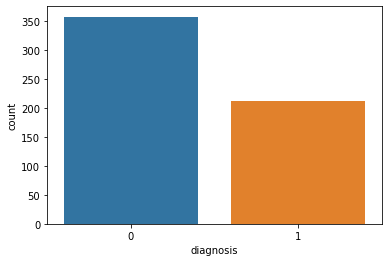

In [203]:
sns.countplot(x="diagnosis", data=df)


In [112]:
from sklearn.model_selection import cross_val_score

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping
overfitCallback = EarlyStopping(monitor='loss', patience = 3)
model = KerasClassifier(model=create_model, epochs=10000, batch_size=10, verbose=0,callbacks=[overfitCallback])

kfold = 3
accuracy = cross_val_score(model, x_train, y_train, cv=kfold,scoring='accuracy')
print('accuracy:')
print(accuracy.mean())
recall = cross_val_score(model, x_train, y_train, cv=kfold,scoring='recall')
print('recall:')
print(recall.mean())
precision = cross_val_score(model, x_train, y_train, cv=kfold,scoring='precision')
print('precision:')
print(precision.mean())
f1_macro = cross_val_score(model, x_train, y_train, cv=kfold,scoring='f1_macro')
print('f1_macro:')


accuracy:
0.9648832345765075
recall:
0.9353592314118631
precision:
0.9642633228840126
f1_macro:


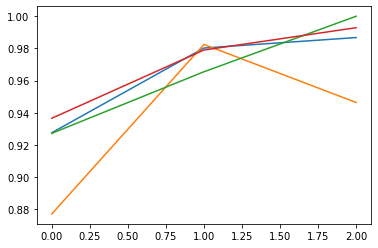

In [113]:
import seaborn as sns
sns.lineplot(data=accuracy)
sns.lineplot(data=recall)
sns.lineplot(data=precision)
sns.lineplot(data=f1_macro)

In [ ]:
final=[np.array(int_features,ndmin=2)]
print(int_features)
print(final)
y_prob = np.array(list(map(predict_prob, model.predict(final))))